In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(['math_score'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [9]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
for cat in df:
    if df[cat].dtype=='O':
        print(f"Categories of {cat}:",df[cat].unique())

Categories of gender: ['female' 'male']
Categories of race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch: ['standard' 'free/reduced']
Categories of test_preparation_course: ['none' 'completed']


In [13]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar", numeric_transformer, num_features),
    ]
)

In [14]:
X=preprocessor.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [24]:
model_list=[]
r2_list=[]
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "CatBoost":CatBoostRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print('- Root Mean sqaured error: {:.4f}'.format(model_train_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_train_mae))
    print('- R2_score: {:.4f}'.format(model_train_r2))

    print("------------------------------------------")

    print('Model Performance for Test set')
    print('- Root Mean sqaured error: {:.4f}'.format(model_test_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_test_mae))
    print('- R2_score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')




LinearRegression
Model Performance for Training set
- Root Mean sqaured error: 5.3231
- Mean absolute error: 4.2667
- R2_score: 0.8743
------------------------------------------
Model Performance for Test set
- Root Mean sqaured error: 5.3940
- Mean absolute error: 4.2148
- R2_score: 0.8804


Lasso
Model Performance for Training set
- Root Mean sqaured error: 6.5938
- Mean absolute error: 5.2063
- R2_score: 0.8071
------------------------------------------
Model Performance for Test set
- Root Mean sqaured error: 6.5197
- Mean absolute error: 5.1579
- R2_score: 0.8253


Ridge
Model Performance for Training set
- Root Mean sqaured error: 5.3233
- Mean absolute error: 4.2650
- R2_score: 0.8743
------------------------------------------
Model Performance for Test set
- Root Mean sqaured error: 5.3904
- Mean absolute error: 4.2111
- R2_score: 0.8806


KNeighborsRegressor
Model Performance for Training set
- Root Mean sqaured error: 5.7079
- Mean absolute error: 4.5168
- R2_score: 0.8555
--

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForest,0.853222
7,CatBoost,0.851632
8,AdaBoost,0.849208
6,XGBoost,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTree,0.758382


In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 88.04%


Text(0, 0.5, 'Predicted')

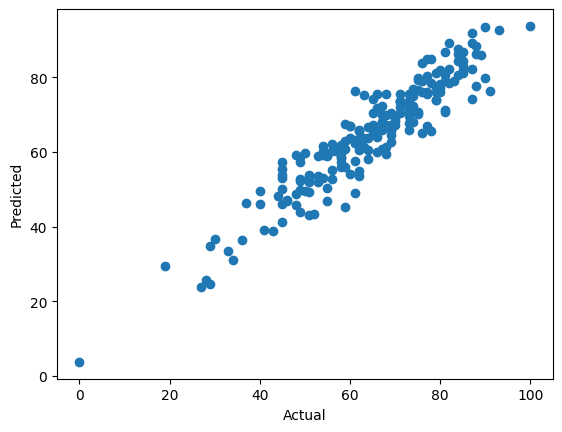

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

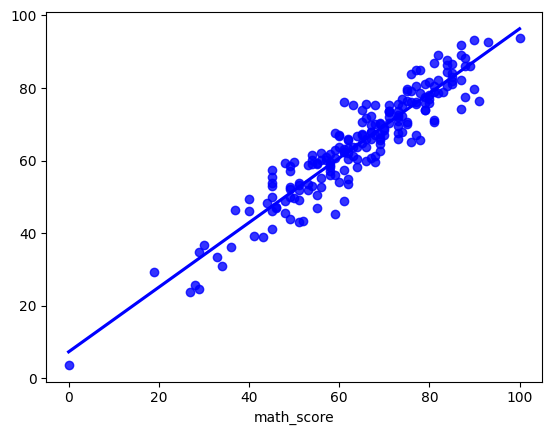

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='blue')

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
